## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import keras
import tensorflow as tf
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization, Conv2D,MaxPool2D
from keras.callbacks import EarlyStopping


#from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


### Find no.of samples are there in training and test datasets

In [2]:
x_train.shape[0]


60000

In [3]:
x_test.shape[0]

10000

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Find dimensions of an image in the dataset

In [6]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#Build graph

keras.backend.clear_session()

model = keras.models.Sequential()
x_train = x_train/255
y_train = y_train/255


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
#model.add(keras.layers.BatchNormalization())

In [10]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
import tensorflow as tf
from keras.layers import Dense,Flatten,Activation,Dropout,BatchNormalization, Conv2D,MaxPool2D
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [12]:
#Applying Conv Layers, MaxPooling
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))

# Flatten
model.add(keras.layers.Flatten())

# passing feature map into 2 fully connected layers

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
%%time
#callbacks = [EarlyStopping(monitor='val_loss', patience=5, mode='auto')]
model.fit(x_train,y_train, 
          validation_data=(x_test,y_test),
          epochs=10,batch_size=32,
          callbacks=[EarlyStopping(monitor='val_loss', 
          patience=5, mode='auto')]
         )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0015 - acc: 0.8637 - val_loss: 1.9285 - val_acc: 0.8764
Epoch 2/10
60000/60000 [==============================] - 10s 167us/step - loss: 9.1120e-04 - acc: 0.9143 - val_loss: 1.8110 - val_acc: 0.8848
Epoch 3/10
60000/60000 [==============================] - 10s 170us/step - loss: 6.7027e-04 - acc: 0.9364 - val_loss: 1.9928 - val_acc: 0.8738
Epoch 4/10
60000/60000 [==============================] - 10s 168us/step - loss: 4.8258e-04 - acc: 0.9539 - val_loss: 1.8848 - val_acc: 0.8806
Epoch 5/10
60000/60000 [==============================] - 10s 168us/step - loss: 3.3213e-04 - acc: 0.9689 - val_loss: 1.9333 - val_acc: 0.8785
Epoch 6/10
60000/60000 [==============================] - 10s 168us/step - loss: 2.2275e-04 - acc: 0.9799 - val_loss: 1.8494 - val_acc: 0.8840
Epoch 7/10
60000/60000 [========================

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Build graph

keras.backend.clear_session()

modelF = keras.models.Sequential()
#modelF.add(keras.layers.Reshape((28,28,1)))
modelF.add(keras.layers.BatchNormalization())

#Applying Conv Layers
modelF.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
modelF.add(keras.layers.Conv2D(32,(3,3),activation='relu'))

#Add MaxPooling and dropout

modelF.add(keras.layers.MaxPool2D(pool_size=(2,2)))
modelF.add(keras.layers.Dropout(.25))

# Flatten
modelF.add(keras.layers.Flatten())

# passing feature map into 2 fully connected layers

modelF.add(keras.layers.Dense(128,activation='relu'))
modelF.add(keras.layers.Dense(10,activation='softmax'))
modelF.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
%%time
modelF.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=32,callbacks=[EarlyStopping(monitor='val_loss', patience=5, mode='auto')])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.0015 - acc: 0.8624 - val_loss: 2.4100 - val_acc: 0.8465
Epoch 2/10
60000/60000 [==============================] - 9s 148us/step - loss: 9.8342e-04 - acc: 0.9077 - val_loss: 2.1185 - val_acc: 0.8638
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 7.9996e-04 - acc: 0.9240 - val_loss: 1.6981 - val_acc: 0.8912
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 6.8117e-04 - acc: 0.9341 - val_loss: 1.9875 - val_acc: 0.8729
Epoch 5/10
60000/60000 [==============================] - 9s 148us/step - loss: 5.6856e-04 - acc: 0.9448 - val_loss: 1.9669 - val_acc: 0.8754
Epoch 6/10
60000/60000 [==============================] - 9s 147us/step - loss: 4.8669e-04 - acc: 0.9534 - val_loss: 2.2540 - val

In [17]:
modelF.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
__________

### Now, to the above model, lets add Data Augmentation 

In [0]:
transform_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.2)


### Import the ImageDataGenrator from keras and fit the training images

In [0]:
transform_fn.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

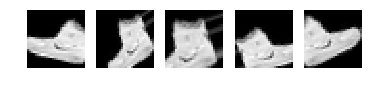

In [20]:
from matplotlib import pyplot as plt
gen = transform_fn.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [21]:
x_train.shape

(60000, 28, 28, 1)

### Run the above model using fit_generator()

In [22]:
%%time
modelF.fit_generator(transform_fn.flow(x_train,y_train,batch_size=32),
                     steps_per_epoch=len(x_train)/32,
                     epochs=10,
                     callbacks=[EarlyStopping(monitor='loss', patience=5, mode='auto')]
                    )

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0035 - acc: 0.6743
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0027 - acc: 0.7487
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0024 - acc: 0.7703
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0023 - acc: 0.7839
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0022 - acc: 0.7936
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0021 - acc: 0.8012
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0021 - acc: 0.8063
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0020 - acc: 0.8080
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0020 - acc: 0.8135
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0019 - acc: 0.8169
CPU times

In [23]:
modelF.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
__________

###  Report the final train and validation accuracy

In [24]:
modelF.evaluate(x_train,y_train)

60000/60000 [==============================] - 3s 53us/step


[0.0014032730104401707, 0.8667166666666667]

In [25]:
modelF.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 52us/step


[9.623501664733887, 0.396]

In [26]:
print('The train accuracy is',modelF.evaluate(x_train,y_train)[1])

60000/60000 [==============================] - 3s 53us/step
The train accuracy is 0.8667166666666667


In [27]:
print('The test accuracy is',modelF.evaluate(x_test,y_test)[1])

10000/10000 [==============================] - 1s 53us/step
The test accuracy is 0.396


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [28]:
(trainX,trainY),(testX,testY) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [29]:
trainX.shape

(50000, 32, 32, 3)

In [30]:
testX.shape

(10000, 32, 32, 3)

In [0]:
trainX = trainX/255
testX=testX/255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
Dgen = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               vertical_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30,
                                                               shear_range=0.2,
                                                               zoom_range=0.2)


### **Prepare/fit the generator.**

In [33]:
%%time
Dgen.fit(trainX)


CPU times: user 455 ms, sys: 777 ms, total: 1.23 s
Wall time: 1.23 s


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

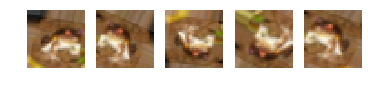

In [34]:
from matplotlib import pyplot as plt
gen = Dgen.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()